# Introduction to Fixed Income

In financial markets, fixed income is the largest and arguably most influential asset class. Sovereign bond markets set the rate of interest on governments' long-term borrowing and serve as a benchmark for mortgage lending rates. Corporate bonds raise money for capital expenditures which in turn drives economic activity. It is where banks draw or provide excess liquidity in the short-term lending markets which in turn is used to provide long-term lending to the private sector.

Fixed income securities, in general, have a known or defined set of cash flow payments and an expiry date. Unlike equities which do not naturally expire and their cash payments to stockholders, is at the discretion of the stock issuer. Equity investments rely on growth either through dividends or capital appreciation of stock prices. When a company does well, equity holders get their 'fair' share of the profits. 

This is not the case for debt holders, instead, future income streams are known and do not fluctuate with respect to the debt issuer's business performance. Debt holders are far more concerned with the borrower's ability to pay the contracted cash flows and their remaining purchasing power upon receipt.

Equity investors are in the game of selecting companies that will do well and ultimately, winners. Bond investors like calm and stable companies that can manage and repay their debts, they are primarily in the game of avoiding losers.

## Cash Flows
In its most basic form, a bond is a structure of future cash flows that are exchanged for a single cash flow today. To value a defaultless bond, we need to:

1) Identify the cash flow amounts and when we will receive them; 

2) Determine the required yield to compensate for the time and risk associated with the cash flows which is finally used to; 

3) Discount and sum the future cash flows to find the present value of the bond.

In our first example, we are going to use a defaultless bond that matures in 10 years from today and pays a 7% coupon annually. Let us first model the cash flows in Python:

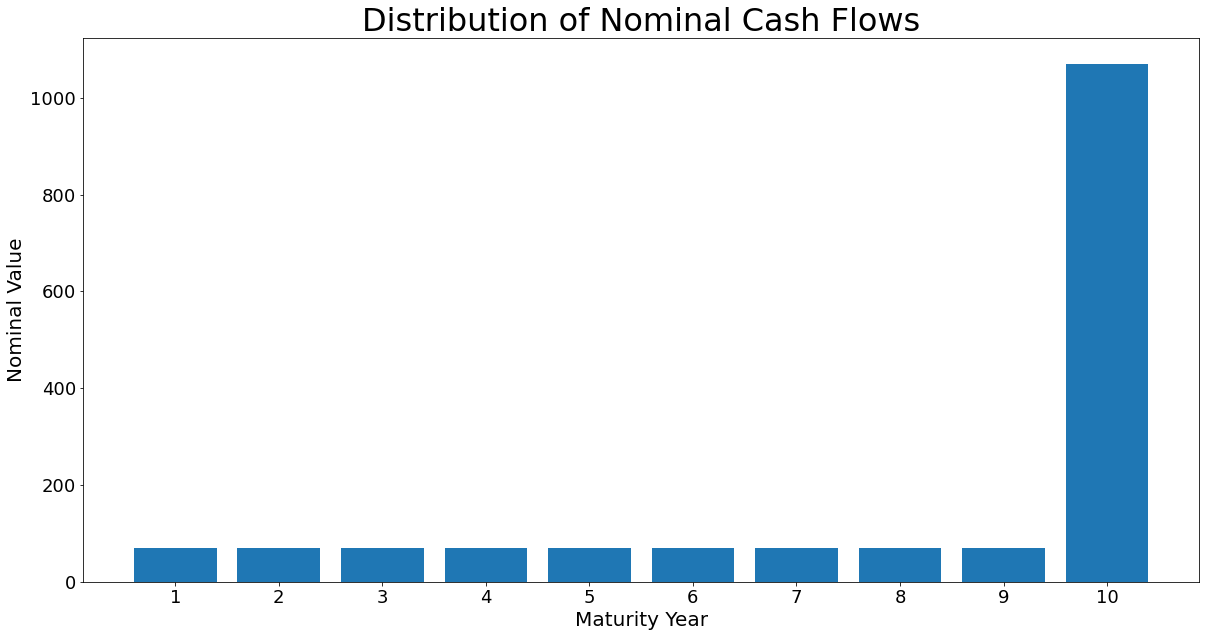

In [1]:
import matplotlib.pylab as plt
from matplotlib import ticker
import numpy as np
from mpl_toolkits import mplot3d

def cf_series(face, coupon, maturity):
    """
    A function which generates a list that contains the structure of cash 
    flows for a bond that pays an annnual coupon
    
    INPUTS:
    #face = the final redemption value of the bond, also known as par amount 
        or principal.
    
    #coupon = the coupon rate paid by the bond.
    
    #maturity = the number of years until the bond matures and pays back it's 
        face value.
    
    OUTPUT:
    #cf = a list that contains the modelled cash flows of the bond
    """
    cf = []
    for c in range(maturity):
        cf.append(face * coupon) #structures the coupon payments
    cf[-1] = cf[-1] + face # adds the face amount to the final cash flow
    return cf

# cash flow structure of a bond with a $1,000 face value, 7% annual coupon 
# and matures in 10 years

bond_a_cf = cf_series(1_000, 0.07, 10)

# illustrate the cash flows using a bar chart

# chart data:
plt.figure(figsize = (20, 10))
plt.bar(list(range(1, len(bond_a_cf)+1)), bond_a_cf)
# chart formatting:
plt.title("Distribution of Nominal Cash Flows", fontsize=32)
plt.xlabel("Maturity Year",fontsize=20)
plt.ylabel("Nominal Value",fontsize=20)
plt.xticks(range(1, len(bond_a_cf)+1),fontsize=18)
plt.yticks(fontsize=18)

plt.show()

## Discount Factors
These cash flows are in nominal terms, meaning that they have not been adjusted. Academia, at this point, will throw the present value and discount factor formulae at you and told you to simply apply them to each cash flow. Let us instead take a moment to build some intuition and think about discount factors in economical terms. To discount a single cash flow:

### $$ PV=\frac{FV_{t}}{\left( 1+i_{t} \right)^{t}} $$

$ \text{where:}$

$PV=\text{Present value of cash flow}$

$FV=\text{Future value of cash flow}$

$t=\text{Time, years until receipt of cash flow }$

$i=\text{interest rate for time, t}$

Re-arrange and express the terms of a single coupon:

### $$ \text{present value of coupon} = \text{coupon} \cdot \frac{1}{\left( 1+i_{t} \right)^{t}}=coupon\left( 1+i_{t} \right)^{-t} $$

For a fixed rate bond (a bond where the coupon rate never changes) the coupon amount is a constant. We can think of the coupon as a good that we are purchasing. I want to focus on this expression:

$$ \frac{1}{\left( 1+i_{t} \right)^{t}} $$

Unless the interest rate is negative this expression will evaluate to $<1$. The numerator is the dollar value of a dollar today, so $1$. The denominator is today's dollar value of a dollar at time $ t$:

$$ \frac{$ \ of\ year \ zero}{ $ \ of\ year \ t } $$

Therefore this ratio is an exchange rate that is multiplied against the coupon, our good. This means that instead of just interpreting discount factors as decimal values and the reciprocal of $\left( 1+r_{i} \right)^{t}$ We can instead view them as prices!

Similar to how we generated the cash flows for the bond let's calculate the discount factors. Because we are evaluating a defaultless bond we can use the risk-free spot rates going out to the maturity of the bond. The structure of these rates is commonly known as a spot/yield curve or a term structure.

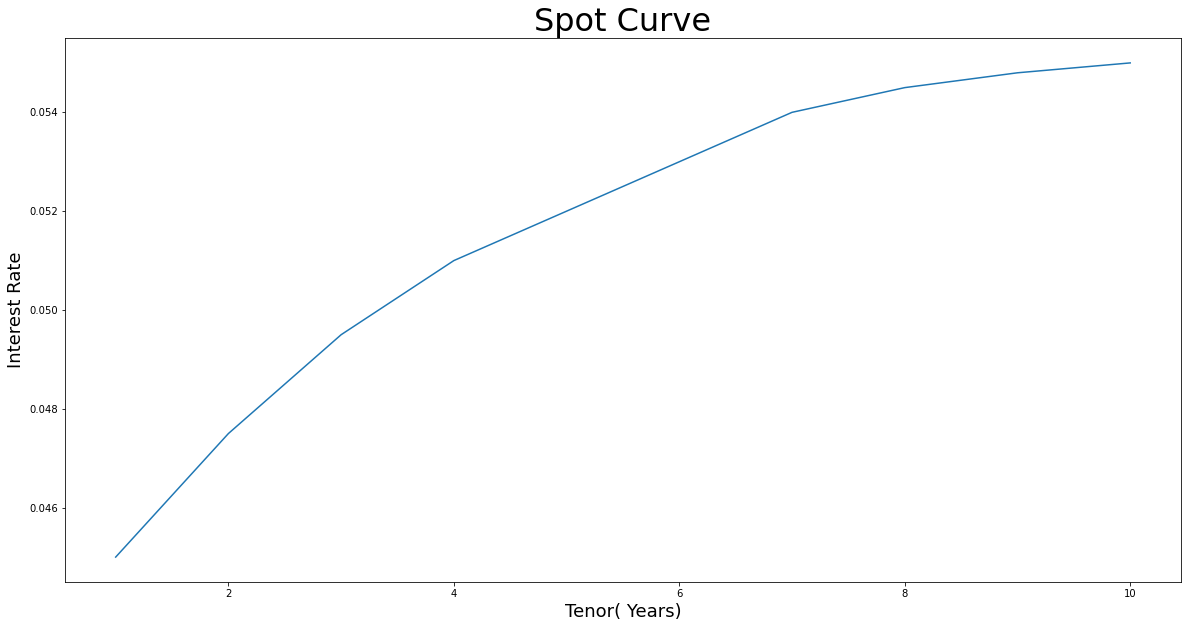

In [2]:
# tenors and spot_rates make up our term structure of rates
tenors = list(range(1,11))
spot_rates = [0.0450, 0.0475, 0.0495, 0.0510, 0.0520, 
              0.0530, 0.0540, 0.0545, 0.0548, 0.0550]

# a list comprehension that uses the discount factor formula 
# for each tenor and it's respective spot rate
discount_factors = [(1 + spot_rates[i]) ** -tenors[i] 
                    for i in range(len(tenors))]

# plot the curve

# data:
plt.figure(figsize = (20, 10))
plt.plot(tenors, spot_rates)
# formatting:
plt.title("Spot Curve",fontsize=32)
plt.xlabel("Tenor( Years)",fontsize=18)
plt.ylabel("Interest Rate",fontsize=18)

spot_curve = plt.show()

## Present Value of Bond
Now we will find the present value of the bond's cash flows using the discount factors, the sum of which is the bond value. When we combine the modelled cash flows and the discount factors we arrive at the open form of the bond price formula:

### $$B=\sum_{t=1}^{T}\frac{C}{\left( 1+i_{t} \right)^{t}}+\frac{B_{T}}{\left( 1+i_{T} \right)^{T}}$$

$ \text{where:}$

$ B=\text{Bond Value}$

$t=\text{Time, years until receipt of cash flow}$

$T=\text{Maturity of the bond, years}$

$i_{t}=\text{Interest rate for time, t or T}$

$C=\text{Coupon amount}=\frac{\text{coupon rate}}{\text{coupon frequency}} \times \text{face amount}$

$B_{T}=\text{Bond face value}$

The sum of the bond's discounted cash flows is $1118.33


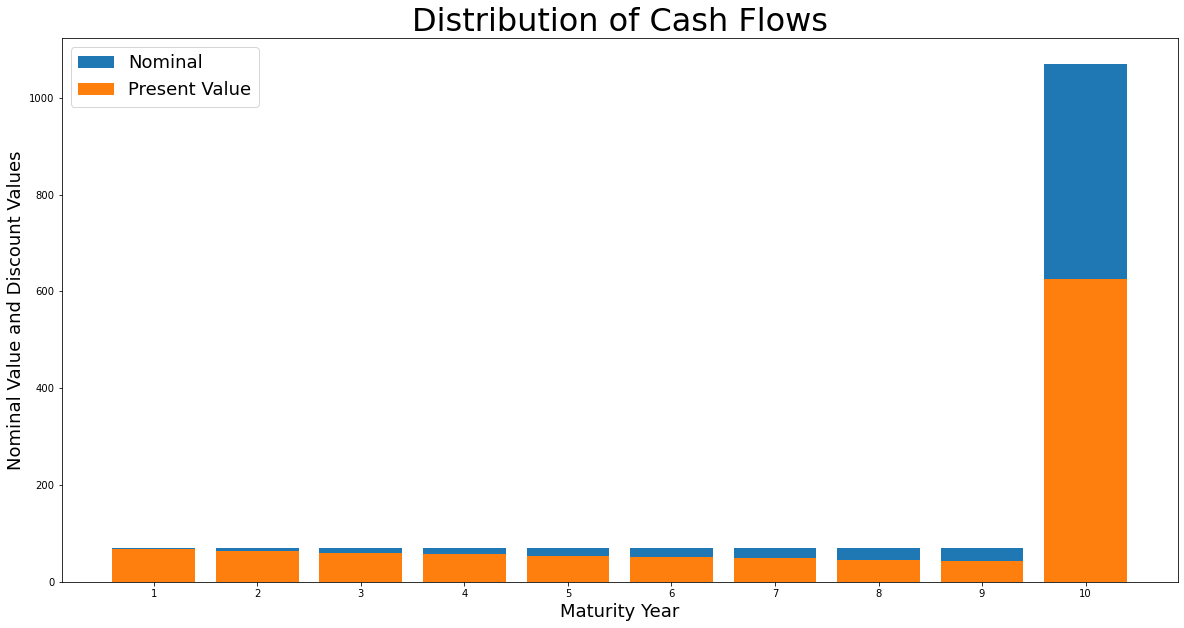

In [4]:
# multiply each cash flow by its respective discount factor for each time t
bond_a_cf_dis = [bond_a_cf[i] * discount_factors[i] 
                 for i in range(len(bond_a_cf))]

# sum of the present values
bond_value = sum(bond_a_cf_dis)

print(f"The sum of the bond's discounted cash flows is ${round(bond_value,2)}")

# illustrate the cash flows using a bar chart

# data:
plt.figure(figsize = (20, 10))
plt.bar(list(range(1, len(bond_a_cf)+1)), bond_a_cf, label = "Nominal")
plt.bar(list(range(1, len(bond_a_cf)+1)), bond_a_cf_dis, label = "Present Value")

# chart formatting:
plt.title("Distribution of Cash Flows", fontsize = 32)
plt.xlabel("Maturity Year", fontsize = 18)
plt.ylabel("Nominal Value and Discount Values", fontsize = 18)
plt.xticks(range(1, len(bond_a_cf) + 1))
plt.legend(fontsize = 18)

plt.show()

Now that we can calculate the present value of a given bond and term structure, curiosity leads us to; what causes a bond's price to change? Let us revisit the closed form of the bond price formula:

$$B=\sum_{t=1}^{T}\frac{C}{\left( 1+i_{t} \right)^{t}}+\frac{B_{T}}{\left( 1+i_{t} \right)^{T}}$$

From this formula it is not hard to see the inverse relationship between interest rates and bond prices, but what about the passage of time? As we approach the maturity of the bond the number of coupons in the summation $ \sum_{t=1}^{T}\frac{C}{\left( 1+r_{i} \right)^{t}} $ are reduced in turn decreasing the present value of the bond. At the same time the present value of the redemption value, $\frac{B_{T}}{\left( 1+r_{i} \right)^{T}}$ increases. The bond's price relationship with time is unclear from this expression.

To help us understand the effect that the passage of time has we are going to assume a flat term structure and we are going to re-arrange the formula to a closed-form so that we can infer changes in the bond price from changes in the input variables. This is another formula that many memorise blindly without extracting intuition: 

$$B=\frac{C}{i} \left[ 1-\frac{1}{\left( 1+ i \right)^{T}} \right]+\frac{B_{T}}{\left( 1+i\right)^{T}}$$

$ \text{where:}$

$ B=\text{Bond Value}$

$C=\text{Coupon amount}=\frac{\text{coupon rate}}{\text{coupon frequency}} \times \text{face amount}$

$i=\text{Constant yield}$

$T=\text{Maturity of the bond, years}$

$B_{T}=\text{Bond face value}$

Finally, we divide both sides by the par value of the bond $ B_{T}$ to reflect the market convention of quoting bond prices in terms of % of par, also known as bond points which uses a minimum accuracy of four decimals.

$$\frac{B}{B_{T}}=\frac{\frac{C}{B_{T}}}{i} \left[ 1-\frac{1}{\left( 1+ i \right)^{T}} \right]+\frac{1}{\left( 1+i\right)^{T}}$$

From this expression we can now see that a bond price is always between $\frac{\frac{C}{B_{T}}}{i}$ and $1$, where $\frac{\frac{C}{B_{T}}}{i}$ can be greater or less than $1$. The bond will be above par if and only if the coupon rate is greater than the rate of interest. Conversely, it will be below par if and only if the coupon rate is below the rate of interest. 

We can also see as $T$ becomes smaller with the passage of time that $\frac{1}{\left( 1+ i \right)^{T}}$ approaches $1$ causing this entire expression, $\frac{\frac{C}{B_{T}}}{i} \left[ 1-\frac{1}{\left( 1+ i \right)^{T}} \right]$ to approach zero whilst $\frac{1}{\left( 1+i\right)^{T}}$ approaches $1$. 

For a bond that is priced at a premium (above par, $100<$) this process will be decreasing the price of the bond, converging towards par, whilst a discount bond (below par, $100>$) will increase in price, converging to par. Let's model this in Python for a range of constant yield assumptions.

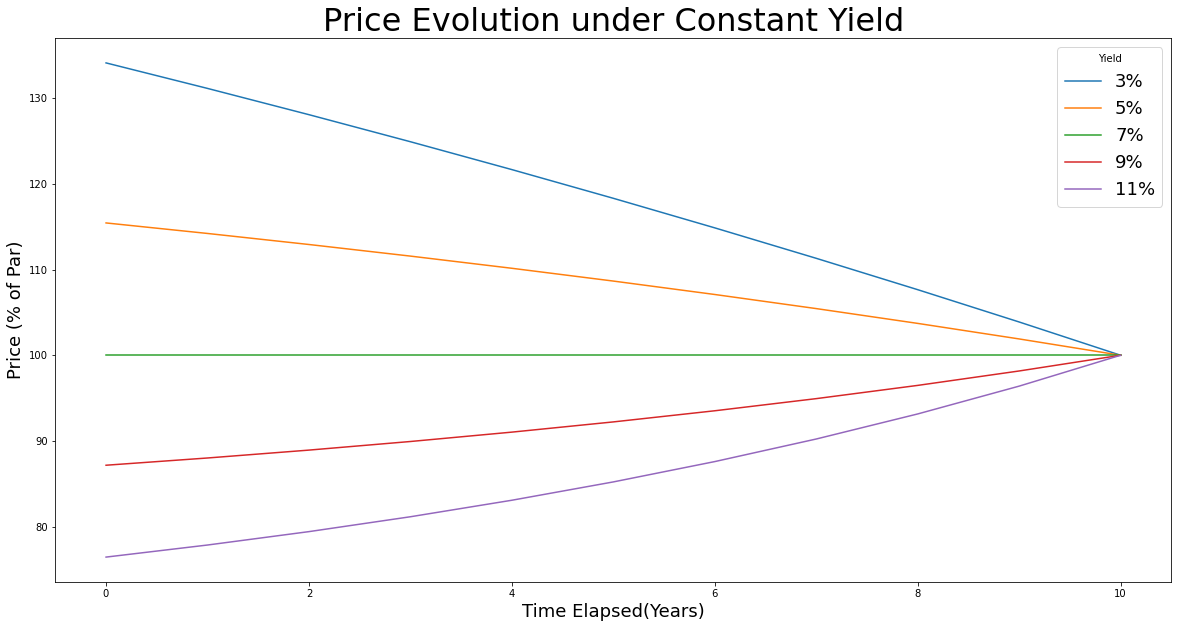

In [7]:
def bond_price_time_elapsed(face, coupon, maturity, yld):
    """
    This function uses the analytical form of the bond price formula to output 
    a list of prices for bonds for different years remaining until maturity 
    at a constant yield.
    
    INPUTS:
    #face = the final redemption value of the bond, also known as par amount 
        or principal.
    
    #coupon = the coupon rate(%) paid by the bond.
    
    #maturity = the number of years until the bond matures and pays back 
        it's face value.
    
    #yld = rate of interest, uses a constant yield assumption, also known as 
        flat term structure
    
    OUTPUTS:
    #prices = a list that contains the price of the bond for each year from 
        today until maturity
    """
    prices = []
    coupon_amount = face * coupon
    for t in reversed(range(maturity + 1)):
        prices.append(((coupon_amount / face) / yld * 
                       (1 - 1 / (1 + yld) ** t) 
                       + 1 / (1 + yld) ** t) * 100)
    return prices

# using the same 10-year 7% annual coupon defaultless bond:

face = 1000
coupon = 0.07
maturity = 10

# model the prices for different levels of interest: 
# flat term structures at 3, 5, 7, 9 and 11% 

bond_3yld = bond_price_time_elapsed(face, coupon, maturity, 0.03)
bond_5yld = bond_price_time_elapsed(face, coupon, maturity, 0.05)
bond_7yld = bond_price_time_elapsed(face, coupon, maturity, 0.07)
bond_9yld = bond_price_time_elapsed(face, coupon, maturity, 0.09)
bond_11yld = bond_price_time_elapsed(face, coupon, maturity, 0.11)

# plot the price paths over time

# chart data:
plt.figure(figsize = (20, 10))
x_axis_yld = list(range(maturity+1))
plt.plot(x_axis_yld, bond_3yld, label = "3%")
plt.plot(x_axis_yld, bond_5yld, label ="5%")
plt.plot(x_axis_yld, bond_7yld, label ="7%")
plt.plot(x_axis_yld, bond_9yld, label ="9%")
plt.plot(x_axis_yld, bond_11yld, label ="11%")
# chart formatting
plt.title("Price Evolution under Constant Yield", fontsize = 32)
plt.xlabel("Time Elapsed(Years)", fontsize = 18)
plt.ylabel("Price (% of Par)", fontsize = 18)
plt.legend(title = "Yield", fontsize = 18)
plt.show()

As mentioned, we can see that the bond value $(B)$ approaches the bond's face value $(B_{T})$ as time elapsed approaches the maturity of the bond. 

Our assumption of a flat and constant yield throughout the life of the bond is far from realistic but it is useful to demonstrate the price behaviour of a bond. 

In this model, if a bond was moving along the 3% constant yield price path towards maturity and the entire flat curve shifted 2% so that the flat term structure is now 5%. Then the bond would immediately jump from the 3% to the 5% price path and continue towards par. This would also result in a capital loss on the bond equal to the distance between the two paths at the time of the parallel shift in the spot rate curve. 

Notice in the graph that the distance between the paths is greatest when the bond is furthest from maturity? This would suggest that the interest rate sensitivity increases with maturity. Let's model and test this!

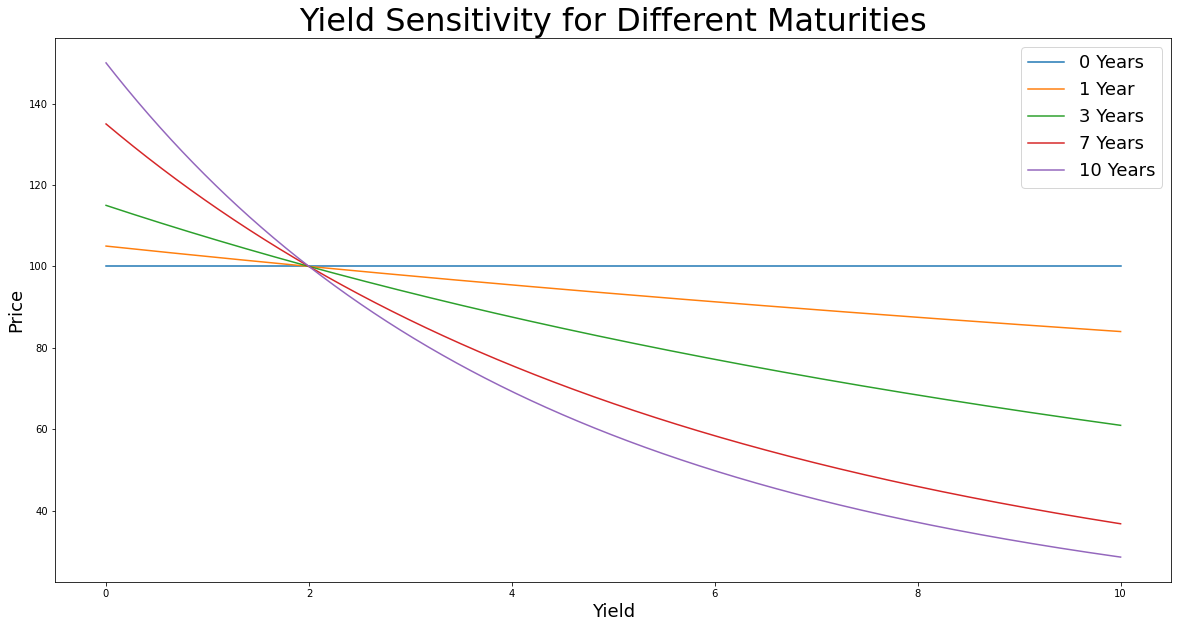

In [16]:
def bond_price_different_maturities(face, coupon, maturity):
    """
    This function calculates the prices of a bond for a range of yields. 
    Maturity is held constant
    
    INPUTS:
    #face = the final redemption value of the bond, also known as par 
        amount or principal.
    
    #coupon = the coupon rate(%) paid by the bond.
    
    #maturity = the number of years until the bond matures and pays 
         back it's face value.
    
    OUTPUTS:
    #prices = a list containing the prices calculated for each yield
    """
    prices = []
    coupon_amount =  face * coupon
    for i in np.linspace(0.0001, 25.0, 1000): #range(1, 12)
        prices.append(((coupon_amount/face) / (i / 100) 
                       * (1 - 1 / (1 + i / 100) ** maturity) 
                       + 1 / (1 + i / 100) ** maturity)*100) 
    return prices

# modelling a 7% annual coupon defaultless bond with various 
# maturities (0, 1, 3, 7, 10 years):

face = 1000
coupon = 0.05

# the prices for each maturity bond across different yields

bond_0mat = bond_price_different_maturities(face, coupon, 0)
bond_1mat = bond_price_different_maturities(face, coupon, 1)
bond_3mat = bond_price_different_maturities(face, coupon, 3)
bond_7mat = bond_price_different_maturities(face, coupon, 7)
bond_10mat = bond_price_different_maturities(face, coupon, 10)

# plot the interest sensitivty of the different maturities:

# chart data:
plt.figure(figsize = (20, 10))
x_axis_mat = np.linspace(0.0001, 10.0, 1000) # list(range(1, 12))
plt.plot(x_axis_mat, bond_0mat, label = "0 Years")
plt.plot(x_axis_mat, bond_1mat, label = "1 Year")
plt.plot(x_axis_mat, bond_3mat, label = "3 Years")
plt.plot(x_axis_mat, bond_7mat, label = "7 Years")
plt.plot(x_axis_mat, bond_10mat, label = "10 Years")

# chart formatting
plt.title("Yield Sensitivity for Different Maturities", fontsize = 32)
plt.xlabel("Yield", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

In this graph, we can see the price sensitivity becomes increasingly non-linear for bonds with greater maturities. We can also see that yield sensitivity is greater on the 'upside' in response to yield decreases than the yield sensitivity on the 'downside' in response to yield increases. This is the convexity of bonds, a fundamental attribute of bonds that will be explored further in future articles.

Using Python we have discovered and illustrated that the value of a non-perpetual and defaultless bond that pays a fixed coupon is a function of time and interest rates. The combined effect on the bond's value from these two inputs is graphed in this 3D surface plot.

Bond max value: 1817.57
Bond min value: 626.53


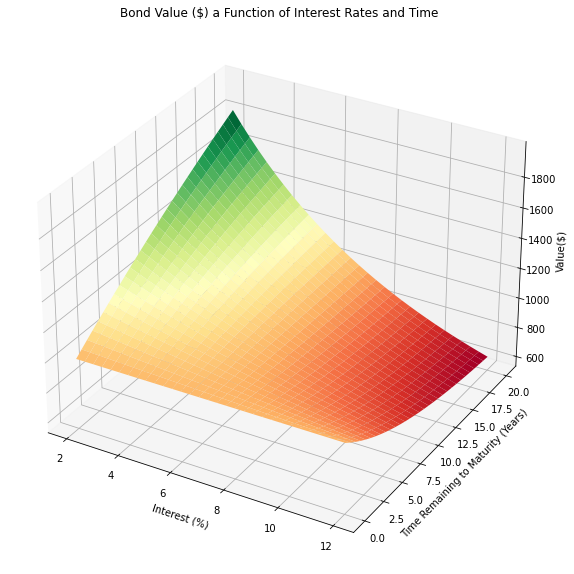

In [28]:
## 3D plot of the bond's value as a function of interest rates and time
# the intervals of our interest rate and time inputs, 

interest_interval = (2.0, 12)
time_interval = (0, 20)

# sample the points between these intervals

interest_points = np.linspace(interest_interval[0], interest_interval[1], 31)
time_points = np.linspace(time_interval[0], time_interval[1], 31)

# set of all ordered interest rate and time pairs, Cartesian product

vect_int, vect_time = np.meshgrid(interest_points, time_points)

def bond_price_3d(vect_int, vect_time, cpn, face = 1000):
    """
    This function uses the analytical form of the bond price formula to 
        output a list of bond prices.
    This function is only designed to generate prices
    for the 3D plot below.
    
    INPUTS:
    #vect_int = a sequence of evenly spaced interest rates
    
    #vect_time = a sequence of evenly spaced time increments
    
    #cpn = cpn rate, expressed as a decimal. I.e. a 7%=0.07
    
    #face = face value of the bond, defaults to $1000
    
    OUTPUT:
    #bond value for given interest rate and time
    """
    coupon_amount = cpn * face
    return coupon_amount / (vect_int / 100) \
                * (1 - 1 / (1 + vect_int / 100) ** vect_time) \
                + face / (1 + vect_int / 100) ** vect_time

# Produce a vectorisied version of the function that can be 
# called on vectors or matrices of inputs

vect_bond_price_3d = np.vectorize(bond_price_3d)

# Compute an output array from our two domain arrays:

vect_prices = vect_bond_price_3d(vect_int, vect_time, 0.07)

# Set up a plotting figure and axes

plt.figure(figsize = (20, 10))
ax = plt.axes(projection = "3d")

# Select a plotting method of the axes object and it on our function data:

ax.plot_surface(vect_int, vect_time, vect_prices, 
                rstride = 1, 
                cstride = 1, 
                cmap = "RdYlGn", 
                edgecolor = None,
               )

# Set other attributes of the plot, title and axis labels:

ax.set(xlabel = "Interest (%)", 
       ylabel = "Time Remaining to Maturity (Years)", 
       zlabel = "Value($)", 
       title = "Bond Value ($) a Function of Interest Rates and Time")
z_limit = np.min(vect_prices) * 0.9, np.max(vect_prices) *1.1
ax.set_zlim(*z_limit) #700, 2500

price_min, price_max = round(np.min(vect_prices),2), \
                        round(np.max(vect_prices),2)

print(f"Bond max value: {price_max}")
print(f"Bond min value: {price_min}")

To summarise, to value a bond we need to:
1) Identify the cash flow amounts and when we will receive them;

2) Determine the required yield to compensate for the time and risk associated with the cash flows;

3) Discount and sum the future cash flows to find the present value of the bond.

Not all bonds are defaultless, pay an annual fixed coupon, have a single and certain maturity date. Bond structures can vary greatly adding complexities and uncertainties making any or all of the above steps difficult.

I leave you with this question: 

*Using the bond value formulae provided in this article, how we can price a perpetual bond?* - A perpetual bond is a bond that never matures and pays a coupon forever.

In the next article we will look at more functional Python code to price bonds.

## Formulae

**Present Value Formula, Single Cash Flow**

$ PV=\frac{FV_{t}}{\left( 1+i_{t} \right)^{t}} $

**Bond Value Formula, open form**

$B=\sum_{t=1}^{T}\frac{C}{\left( 1+i_{t} \right)^{t}}+\frac{B_{T}}{\left( 1+i_{T} \right)^{T}}$

**Bond Value Formula, closed form**

$\frac{B}{B_{T}}=\frac{\frac{C}{B_{T}}}{i} \left[ 1-\frac{1}{\left( 1+ i \right)^{T}} \right]+\frac{1}{\left( 1+i\right)^{T}}$

**Notation:**

$PV=\text{Present value of cash flow}$

$FV=\text{Future value of cash flow}$

$t=\text{Time, years until receipt of cash flow }$

$i=\text{Constant yield}$

$i_{t}=\text{Interest rate for time, t or T}$

$T=\text{Maturity of the bond, years}$

$C=\text{Annual coupon amount}=\text{coupon rate} \times \text{face amount}$

$C_{t}=\text{Coupon amount at time t or T} = \frac{\text{coupon rate}}{\text{coupon frequency}} \times \text{face amount}$

$B_{T}=\text{Bond face value}$

$\frac{B}{B_{T}}= \text{prices in terms of % of par, also known as bond points}$